# Assignment 1
## Niklas Brake

In [135]:
from IPython.display import Image

# Question 1

## (a) 

Given $\dot{X} = \frac{\lambda^2}{\delta(\varepsilon + X)} - \delta X$, we have $\ddot{X} = -\frac{\delta \lambda^2}{(\delta(\varepsilon + X))^2} - \delta$. Therefore, X decreases its own change over time. 
 
![title](Sketch.png)

## (b)

Consider the differential equation

$ \dot{X} + \delta X = \lambda $

With an application of the chain rule, we see that this is equivalent to

$ e^{- \delta t} \frac{d}{dt} \left ( X e^{\delta t} \right )= \lambda $

$ \frac{d}{dt} \left ( X e^{\delta t} \right ) = \lambda e^{\delta t} $

Then by integrating both sides we get

$ X e^{\delta t} = \frac{\lambda}{\delta} e^{\delta t} + X_0 $

$ X = \frac{\lambda}{\delta} + X_0 e^{- \delta t} $

Given our intial condition $ X(0) = 0 $ we have that $ X_0 = - \frac{\lambda}{\delta}$. Thus, our solution is $ X(t) = \frac{\lambda}{\delta} \left ( 1 - e^{- \delta t} \right ) $. As $t \rightarrow \infty$, $X(t) \to \frac{\lambda}{\delta}$. Now, given that 

$\frac{X_\infty}{2} = \frac{\lambda}{2\delta} = \frac{\lambda}{\delta} \left ( 1 - e^{- \delta t_0} \right ) $

We have that $t_0 = \frac{\log 2}{\delta}$

## (c)

Since $X(0) = 0$ and $\varepsilon << 1$, for $t$ small, $\frac{\lambda^2}{\delta(\varepsilon + X)} >> \delta X $, so $\dot{X} > 0$. Therefore, after a short time, $X >> \varepsilon$, so $(\epsilon + X) \approx X$.

Consider the change of variable $ X^2 \mapsto Y $. Then,

$ \dot{Y} = 2X\dot{X} = 2\frac{\lambda^2}{\delta} - 2\delta X^2 = 2\frac{\lambda^2}{\delta} - 2\delta Y $

Since this is the same form as our equation in part (b), we get the same solution, but with the appropriate change of constants, and obtain the expression

$Y = \left ( \frac{\lambda}{\delta} \right )  ^2 \left (1 - e^{-2\delta t} \right) $

As $t \rightarrow \infty$, $Y \rightarrow \left ( \frac{\lambda}{\delta} \right )  ^2$, or $ X \rightarrow \frac{\lambda}{\delta} $. $X(t) = X_\infty / 2$ when $Y(t) = Y_\infty / 4$, so we have,

$\frac{X_\infty}{2} = \frac{Y_\infty}{4} = \frac{1}{4} \left ( \frac{\lambda}{\delta} \right )  ^2 = \left ( \frac{\lambda}{\delta} \right )  ^2 \left (1 - e^{-2\delta t_1} \right) $

we have that $t_1 = \frac{\log 4/3}{2 \delta}$.

## (d)

With negative feedback, the equation relaxes to steady steady faster than when there is no negative feedback; the system with negative feedback reaches half of its asymptotic value twice as fast. In the context of cellular dynamics, negative feedback gives the cell tighter temporal control over its state. However, additional regulation can have drawbacks, such as higher metabolic load or added system complexity which may increase the likelihood of some error occuring.

# Question 2

In [136]:
import numpy as np
import matplotlib.pyplot as plt

def difEQ1(X,delta,eps,L):
    return L**2/(delta*(eps+X)) - delta*X

def difEQ2(X,delta,eps,L):
    return L - delta*X

def eulerIntegrate(fun,T1,T2,dT,X0):
    T = np.linspace(T1,T2-dT,int((T2-T1)/dT)-1)
    X = np.zeros([int((T2-T1)/dT)])
    X[0] = X0
    for idx,t in enumerate(T):
        X[idx+1] = X[idx] + dT*fun(X[idx])
    T = np.linspace(T1,T2,int((T2-T1)/dT))
    return X,T
    
    

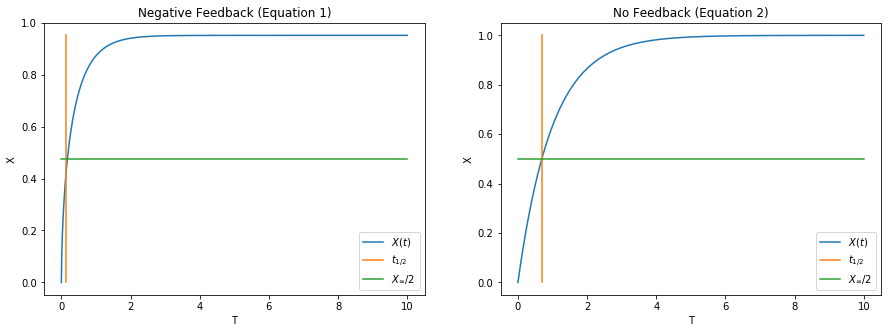

In [137]:
delta = 1
L = 1
eps = 0.1
T0 = 0
T1 = 10
dT = 0.01

fun = lambda x: difEQ1(x,delta,eps,L)
X,T = eulerIntegrate(fun,T0,T1,dT,0)

t0 = np.log(4/3)/(2*delta)
fig = plt.figure(figsize=[15,5])
ax1 = plt.subplot(121)
ax1.plot(T,X)
ax1.plot([t0,t0],[X[0],X[-1]])
ax1.plot([T0,T1],[X[-1]/2,X[-1]/2])
ax1.set_title('Negative Feedback (Equation 1)')
ax1.legend(['$X(t)$','$t_{1/2}$','$X_{\infty}/2$'])
ax1.set_xlabel('T')
ax1.set_ylabel('X')


fun2 = lambda x: difEQ2(x,delta,eps,L)
X,T = eulerIntegrate(fun2,T0,T1,dT,0)

t1 = np.log(2)/(delta)
ax2 = plt.subplot(122)
ax2.plot(T,X)
ax2.plot([t1,t1],[X[0],X[-1]])
ax2.plot([T0,T1],[X[-1]/2,X[-1]/2])
ax2.legend(['$X(t)$','$t_{1/2}$','$X_{\infty}/2$'])
ax2.set_title('No Feedback (Equation 2)')
ax2.set_xlabel('T')
ax2.set_ylabel('X')

plt.show()